In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Overview

In [ ]:
data.shape

data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data['Glucose'].value_counts()

,count
Glucose,
99,17
100,17
111,14
125,14
129,14
...,...
56,1
169,1
149,1


In [ ]:
data['BloodPressure'].value_counts()

,count
BloodPressure,
70,57
74,52
78,45
68,45
72,44
64,43
80,40
76,39
60,37


In [ ]:
cols_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[cols_zero] = data[cols_zero].replace(0, np.nan)
data.isnull().sum()


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data_imputed.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


EDA

In [ ]:
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


Fix errors

In [ ]:
data['Outcome'] = data['Outcome'].astype(int)



In [ ]:
print(data.dtypes)

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Missing values

Outliers

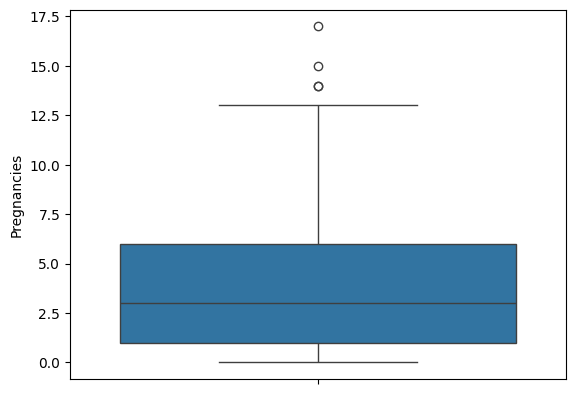

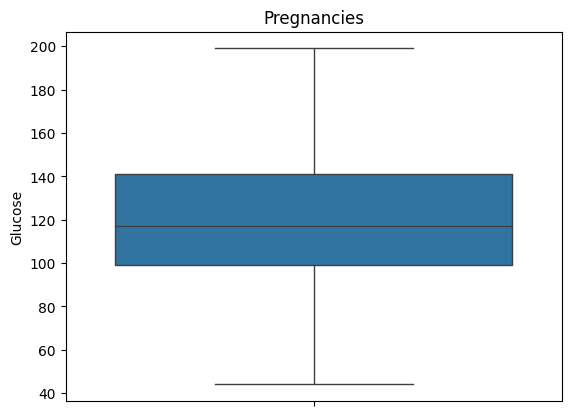

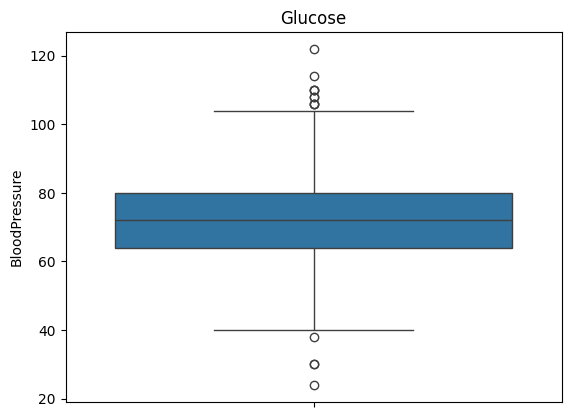

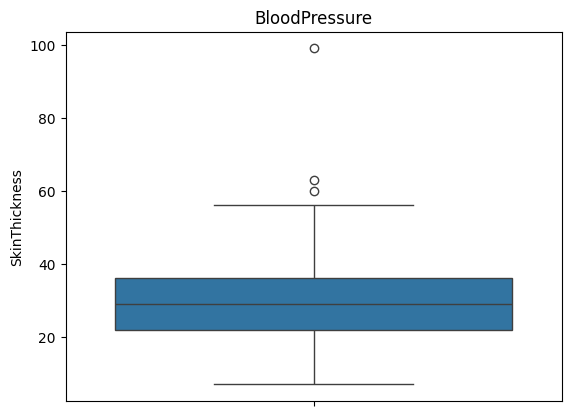

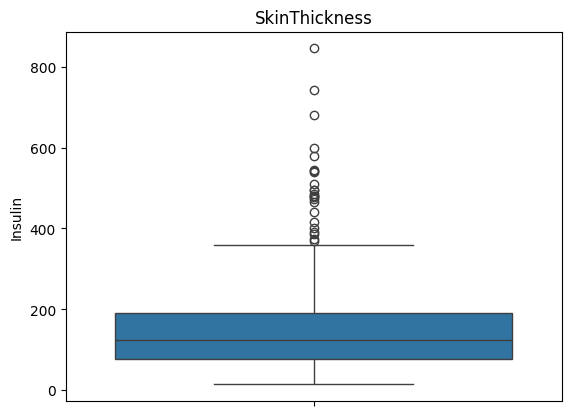

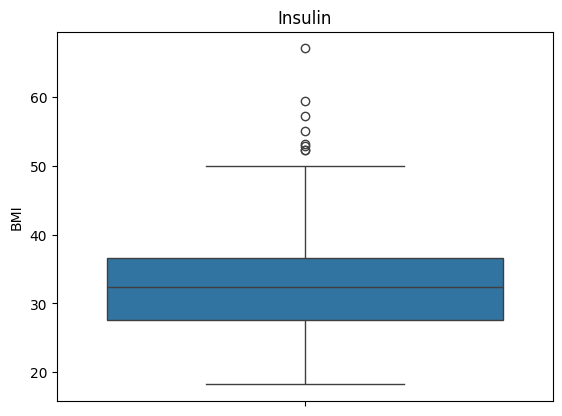

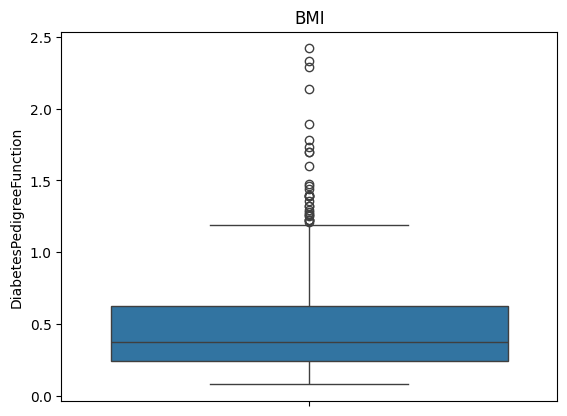

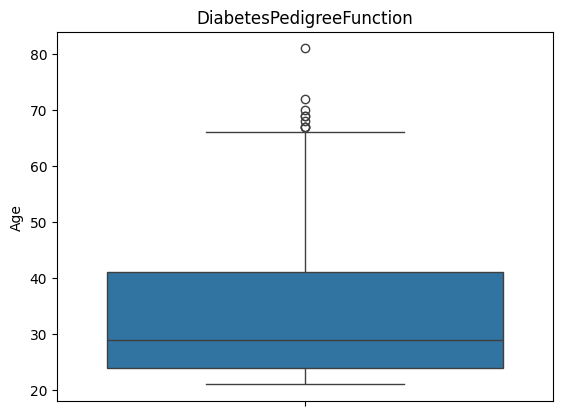

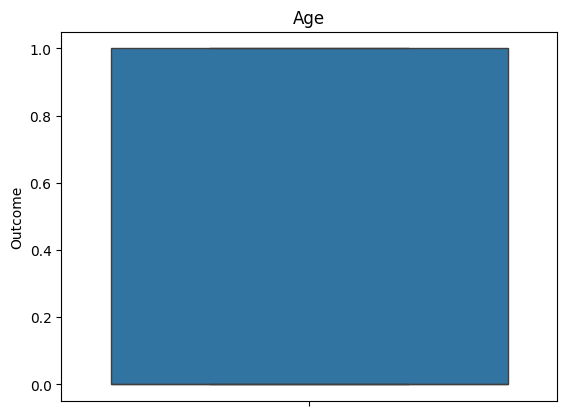

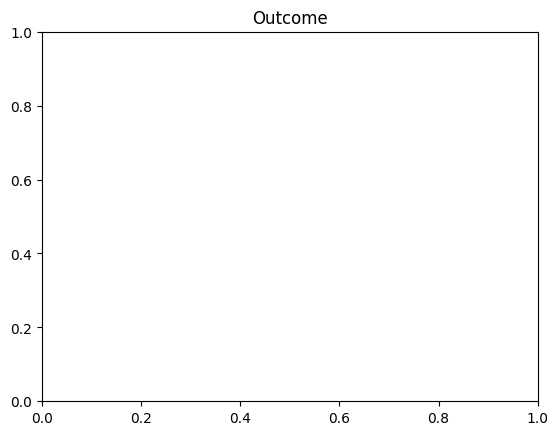

In [ ]:
for col in data.columns:
    sns.boxplot(data[col])
    plt.show()
    plt.title(col)

In [ ]:
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

data_no_out = data_imputed.copy()
for c in ['Glucose','BMI','Insulin','Age']:
    data_no_out = remove_outliers_iqr(data_no_out, c)

print("Shape after outlier removal:", data_no_out.shape)


Shape after outlier removal: (719, 9)


In [ ]:
X = data_no_out.drop(columns=['Outcome'])
y = data_no_out['Outcome']


In [ ]:
X.shape

(719, 8)

In [ ]:
y.shape

(719,)

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Modeling**

Train Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lg = log_reg.predict(X_test_scaled)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lg))
print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:,1]))



=== Logistic Regression ===
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88        97
         1.0       0.81      0.62      0.70        47

    accuracy                           0.83       144
   macro avg       0.82      0.77      0.79       144
weighted avg       0.82      0.83      0.82       144

ROC AUC: 0.8738758499670981


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

params_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

log_reg = LogisticRegression(max_iter=1000)

search_lr = RandomizedSearchCV(
    log_reg, param_distributions=params_lr,
    n_iter=5, cv=5, scoring='accuracy', random_state=42
)

search_lr.fit(X_train_scaled, y_train)
print("Best Logistic Regression:", search_lr.best_params_)
print("Train Accuracy:", search_lr.score(X_train_scaled, y_train))
print("Test Accuracy:", search_lr.score(X_test_scaled, y_test))


Best Logistic Regression: {'solver': 'lbfgs', 'C': 10}
Train Accuracy: 0.7652173913043478
Test Accuracy: 0.8194444444444444


Train Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1]))


=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88        97
         1.0       0.79      0.64      0.71        47

    accuracy                           0.83       144
   macro avg       0.81      0.78      0.79       144
weighted avg       0.82      0.83      0.82       144

ROC AUC: 0.8635665716165826


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
}

grid = GridSearchCV(rf, params, cv=3, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Params: {'max_depth': None, 'n_estimators': 100}
Best Accuracy: 0.7581806282722513


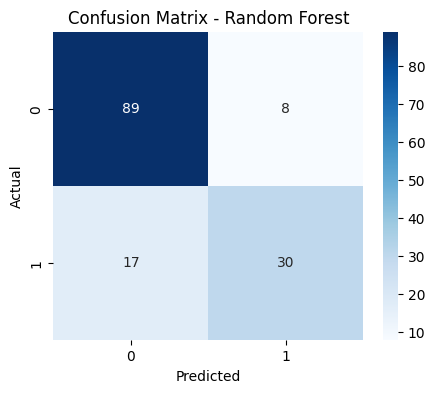

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Train Support Vector Machine (SVM)

In [ ]:
params_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(probability=True, random_state=42), params_svm, cv=5, scoring='accuracy', n_jobs=-1)
best_svm = grid_svm.fit(X_train_scaled, y_train).best_estimator_
acc_svm = evaluate_model("SVM", best_svm, X_train_scaled, y_train, X_test_scaled, y_test)





=== SVM ===
Train Accuracy: 0.779
Test Accuracy: 0.812
ROC AUC: 0.871
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        97
         1.0       0.81      0.55      0.66        47

    accuracy                           0.81       144
   macro avg       0.81      0.75      0.76       144
weighted avg       0.81      0.81      0.80       144



In [ ]:
from sklearn.svm import SVC

params_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid=params_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_svm.fit(X_train_scaled, y_train)

best_svm = grid_svm.best_estimator_
print("Best SVM:", grid_svm.best_params_)
print("Train Accuracy:", best_svm.score(X_train_scaled, y_train))
print("Test Accuracy:", best_svm.score(X_test_scaled, y_test))


Best SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Train Accuracy: 0.7791304347826087
Test Accuracy: 0.8125


AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


base_model = DecisionTreeClassifier(max_depth=1)


ada = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)


ada.fit(X_train_scaled, y_train)

y_pred_ada = ada.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))


Accuracy: 0.8125
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87        97
         1.0       0.83      0.53      0.65        47

    accuracy                           0.81       144
   macro avg       0.82      0.74      0.76       144
weighted avg       0.82      0.81      0.80       144



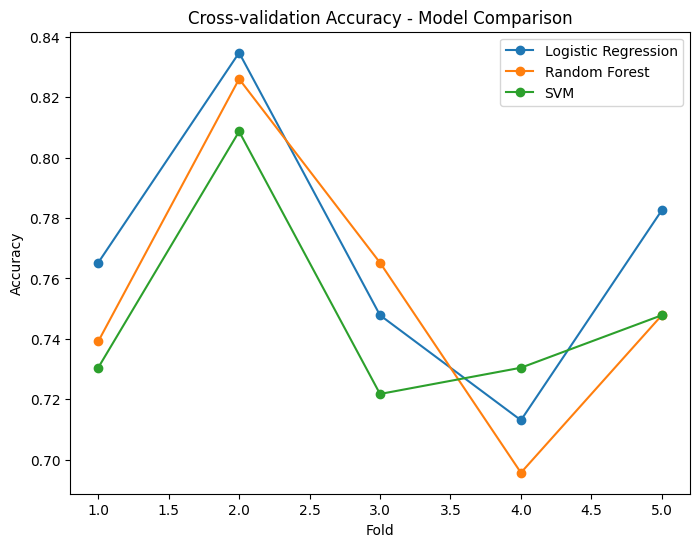

In [ ]:
plt.figure(figsize=(8,6))

for name, scores in results.items():
    plt.plot(range(1,6), scores, marker='o', label=name)

plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Cross-validation Accuracy - Model Comparison")
plt.legend()
plt.show()


Visualization of accuracy comparison 4 models

In [ ]:

from sklearn.metrics import accuracy_score

#y_pred_lr = best_lr.predict(X_test_scaled)
#y_pred_rf = best_rf.predict(X_test_scaled)
#y_pred_svm = best_svm.predict(X_test_scaled)#

# accuracies
acc_results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lg),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "ada": accuracy_score(y_test, y_pred_ada),
}

for model, acc in acc_results.items():
    print(f"{model}: {acc:.4f}")

print("\nBest Model:", max(acc_results, key=acc_results.get))

Logistic Regression: 0.8264
Random Forest: 0.8264
SVM: 0.7917
ada: 0.8125

Best Model: Logistic Regression


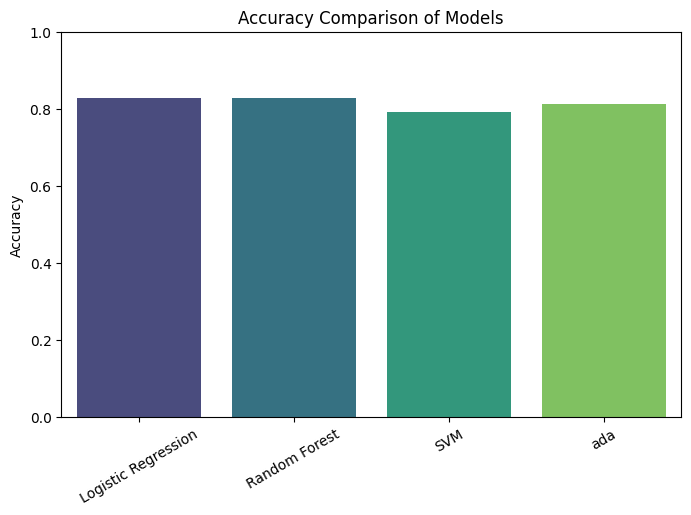

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=list(acc_results.keys()),
    y=list(acc_results.values()),
    hue=list(acc_results.keys()),
    palette="viridis",
    legend=False
)
plt.title("Accuracy Comparison of Models")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.xticks(rotation=30)
plt.show()
